In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [301]:
df = pd.read_excel('raw_response.xlsx')

In [302]:
df.shape

(53, 29)

In [303]:
df.head(5)

id  feeTier  \
0                                         NaN      NaN   
1  0x277667eb3e34f134adf870be9550e9f323d0dc24    100.0   
2  0xa850478adaace4c08fc61de44d8cf3b64f359bec    500.0   
3  0x8c0411f2ad5470a66cb2e9c64536cfb8dcd54d51    100.0   
4  0x055284a4ca6532ecc219ac06b577d540c686669d    100.0   

                      liquidity                       sqrtPrice      tick  \
0                           NaN                             NaN       NaN   
1         313521001529099829406      24804888246164192931094329 -161389.0   
2  1706245281880037395956227425  792049440195001924670217089101   46048.0   
3          40740981393984479118    2480490093522240539905180837  -69281.0   
4                             0                               0       NaN   

                                       token0 Unnamed: 6      Unnamed: 7  \
0                                          id     symbol            name   
1  0x160de4468586b6b2f8a92feb0c260fc6cfc743b1   ease.org  Ease Fun Token   
2  0x12b32f10a499bf40db334efe04226cca00bf2d9b      UMIIE      UMIIE COIN   
3  0x160de4468586b6b2f8a92feb0c260fc6cfc743b1   ease.org  Ease Fun Token   
4  0x160de4468586b6b2f8a92feb0c260fc6cfc743b1   ease.org  Ease Fun Token   

  Unnamed: 8                             Unnamed: 9  ... volumeUSD  \
0   decimals                             derivedETH  ...       NaN   
1         18    833.2528589260775996459425809724284  ...       0.0   
2         18  0.09982560487030552703214533918310228  ...       0.0   
3         18    833.2528589260775996459425809724284  ...       0.0   
4         18    833.2528589260775996459425809724284  ...       0.0   

   volumeToken0  volumeToken1 txCount totalValueLockedToken0  \
0           NaN           NaN     NaN                    NaN   
1  1.000000e-06  9.890000e-14     4.0           1.001400e+06   
2  1.000103e+06  9.993099e+07     9.0           5.005048e+07   
3  1.000000e-06  9.899036e-10     3.0           1.300000e+03   
4  0.000000e+00  0.000000e+00     2.0           1.200001e+03   

  totalValueLockedToken1 totalValueLockedUSD  __typename  \
0                    NaN                 NaN         NaN   
1           9.815769e-02        1.110167e+12        Pool   
2           1.464468e+10        1.288763e+10        Pool   
3           1.275526e+00        1.432077e+09        Pool   
4           1.199880e-11        1.322031e+09        Pool   

                               bundles  Unnamed: 28  
0                          ethPriceUSD   __typename  
1                                  NaN          NaN  
2  1609.287053048210800355547356697953       Bundle  
3                                  NaN          NaN  
4                                  NaN          NaN  

[5 rows x 29 columns]

In [304]:
#First row is not needed in our current operations . delete it

In [305]:
df = df.drop(labels=0, axis=0)

In [306]:
df.head(5)

id  feeTier  \
1  0x277667eb3e34f134adf870be9550e9f323d0dc24    100.0   
2  0xa850478adaace4c08fc61de44d8cf3b64f359bec    500.0   
3  0x8c0411f2ad5470a66cb2e9c64536cfb8dcd54d51    100.0   
4  0x055284a4ca6532ecc219ac06b577d540c686669d    100.0   
5  0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640    500.0   

                      liquidity                           sqrtPrice      tick  \
1         313521001529099829406          24804888246164192931094329 -161389.0   
2  1706245281880037395956227425      792049440195001924670217089101   46048.0   
3          40740981393984479118        2480490093522240539905180837  -69281.0   
4                             0                                   0       NaN   
5          32666062015717520660  1943521180155365744925605444716517  202163.0   

                                       token0 Unnamed: 6      Unnamed: 7  \
1  0x160de4468586b6b2f8a92feb0c260fc6cfc743b1   ease.org  Ease Fun Token   
2  0x12b32f10a499bf40db334efe04226cca00bf2d9b      UMIIE      UMIIE COIN   
3  0x160de4468586b6b2f8a92feb0c260fc6cfc743b1   ease.org  Ease Fun Token   
4  0x160de4468586b6b2f8a92feb0c260fc6cfc743b1   ease.org  Ease Fun Token   
5  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48       USDC        USD Coin   

  Unnamed: 8                               Unnamed: 9  ...     volumeUSD  \
1         18      833.2528589260775996459425809724284  ...  0.000000e+00   
2         18    0.09982560487030552703214533918310228  ...  0.000000e+00   
3         18      833.2528589260775996459425809724284  ...  0.000000e+00   
4         18      833.2528589260775996459425809724284  ...  0.000000e+00   
5          6  0.0006015032979037797759209813119597668  ...  3.390727e+11   

   volumeToken0  volumeToken1    txCount totalValueLockedToken0  \
1  1.000000e-06  9.890000e-14        4.0           1.001400e+06   
2  1.000103e+06  9.993099e+07        9.0           5.005048e+07   
3  1.000000e-06  9.899036e-10        3.0           1.300000e+03   
4  0.000000e+00  0.000000e+00        2.0           1.200001e+03   
5  3.390459e+11  1.593252e+08  4402198.0           2.203507e+08   

  totalValueLockedToken1 totalValueLockedUSD  __typename  \
1           9.815769e-02        1.110167e+12        Pool   
2           1.464468e+10        1.288763e+10        Pool   
3           1.275526e+00        1.432077e+09        Pool   
4           1.199880e-11        1.322031e+09        Pool   
5           8.810010e+04        3.668173e+08        Pool   

                               bundles  Unnamed: 28  
1                                  NaN          NaN  
2  1609.287053048210800355547356697953       Bundle  
3                                  NaN          NaN  
4                                  NaN          NaN  
5                                  NaN          NaN  

[5 rows x 29 columns]

Variables of interest to us are tick, totalvaluelockedUSD and liquidity

In Uniswap v3, the contract
could be thought of as having virtual reserves—values for 𝑥 and 𝑦
that allow you to describe the contract’s behavior (between two
adjacent ticks) as if it followed the constant product formula.
Instead of tracking those virtual reserves, however, the pool
contract tracks two different values: liquidity (𝐿) and sqrtPrice
(√𝑃). (Source : Uniswap v3 whitepaper)

In [307]:
df['tick'].value_counts()

-276330.0    2
-276325.0    2
-7723.0      1
-74113.0     1
 23027.0     1
-94887.0     1
-27273.0     1
-275666.0    1
-280460.0    1
-73977.0     1
-1.0         1
 89617.0     1
-186635.0    1
-161389.0    1
-64150.0     1
 35618.0     1
-276341.0    1
-64238.0     1
 299224.0    1
 202073.0    1
 66.0        1
 24937.0     1
-186683.0    1
-124874.0    1
-74171.0     1
-5.0         1
-56849.0     1
 36.0        1
-69281.0     1
 202163.0    1
 202159.0    1
 257133.0    1
-276322.0    1
-2.0         1
-202160.0    1
 257122.0    1
 0.0         1
 54967.0     1
 46048.0     1
-202167.0    1
-74168.0     1
-54703.0     1
 202164.0    1
-53808.0     1
-70855.0     1
-79120.0     1
 3.0         1
 215346.0    1
 887271.0    1
Name: tick, dtype: int64

In [308]:
df['totalValueLockedUSD'].value_counts()

1.110167e+12    1
1.288763e+10    1
1.797460e+07    1
1.691215e+07    1
1.668738e+07    1
1.606678e+07    1
1.506833e+07    1
1.401336e+07    1
1.371775e+07    1
1.333065e+07    1
1.312034e+07    1
1.272577e+07    1
1.268783e+07    1
1.243912e+07    1
1.240256e+07    1
1.093410e+07    1
1.058507e+07    1
1.012706e+07    1
1.005190e+07    1
9.366314e+06    1
8.877276e+06    1
8.642933e+06    1
8.180878e+06    1
7.822880e+06    1
2.063163e+04    1
1.809407e+07    1
1.921483e+07    1
2.045014e+07    1
9.999921e+07    1
1.432077e+09    1
1.322031e+09    1
3.668173e+08    1
3.510611e+08    1
2.580080e+08    1
2.323919e+08    1
2.034240e+08    1
1.491144e+08    1
1.447731e+08    1
1.444267e+08    1
9.692921e+07    1
2.109340e+07    1
6.926745e+07    1
5.565004e+07    1
5.257668e+07    1
5.091269e+07    1
4.600181e+07    1
3.308418e+07    1
3.204440e+07    1
2.657542e+07    1
2.637667e+07    1
2.177096e+07    1
9.160086e+00    1
Name: totalValueLockedUSD, dtype: int64

In [309]:
df['liquidity']

1            313521001529099829406
2     1706245281880037395956227425
3             40740981393984479118
4                                0
5             32666062015717520660
6             11313240145499630805
7              2307414582084811903
8        1152448374734298514689457
9         200060688131258591913525
10              949076635200445631
11             4229054078423962897
12             1215320564518773963
13              100030202059901997
14         17343302515472834714831
15      12902268534214762145168862
16                   3822298771383
17             2880664566297975714
18       1007630611160079599541700
19        935129463094802500900708
20             2131925582970069501
21       2084381505510565260753011
22       2785888021951905660931987
23        414229171751248874207100
24    4195542518953324596954163127
25    1059630382764831648131867914
26               22137378638661446
27        567263512282923430733469
28        402492456132139212886232
29        6131589207

In [310]:
df['liquidity'].value_counts()

0                               3
313521001529099829406           1
6515107585166109428935          1
613158920780907000974176        1
185517451486731                 1
632471412699428171024177152     1
63794125488852506895390         1
229847445767055955826           1
8332448719551320196             1
526385978472996221448467        1
10005000800029997800038009      1
415627092933236723892868        1
25197212044027123604135987      1
32871470528854460174042         1
567263512282923430733469        1
546751494844807590906           1
165460617587505010601098        1
46259139346298173734            1
10003648886100921765758         1
60130650288444206               1
654282439326356069745446        1
23051425209323556248493505      1
188962637413555730158719078     1
6965877171708104465551          1
402492456132139212886232        1
22137378638661446               1
1706245281880037395956227425    1
1059630382764831648131867914    1
40740981393984479118            1
32666062015717

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      52 non-null     object 
 1   feeTier                 52 non-null     float64
 2   liquidity               52 non-null     object 
 3   sqrtPrice               52 non-null     object 
 4   tick                    51 non-null     float64
 5   token0                  52 non-null     object 
 6   Unnamed: 6              52 non-null     object 
 7   Unnamed: 7              52 non-null     object 
 8   Unnamed: 8              52 non-null     object 
 9   Unnamed: 9              52 non-null     object 
 10  Unnamed: 10             52 non-null     object 
 11  token1                  52 non-null     object 
 12  Unnamed: 12             52 non-null     object 
 13  Unnamed: 13             52 non-null     object 
 14  Unnamed: 14             52 non-null     obje

Renaming the columns which are unnamed . 
t0 stands for token0
t1 stands for token1 

In [312]:
df = df.rename(columns={'token0': 't0_id', 'Unnamed: 6':'t0_symbol','Unnamed: 7':'t0_name','Unnamed: 9':'t0_derivedETH'})

In [313]:
df = df.rename(columns={'Unnamed: 8':'t0_decimals','Unnamed: 10':'t0_typename'})

In [314]:
df = df.rename(columns={'token1': 't1_id', 'Unnamed: 12':'t1_symbol','Unnamed: 13':'t1_name','Unnamed: 14':'t1_derivedETH'})

In [315]:
df = df.rename(columns={'Unnamed: 15':'t1_decimals','Unnamed: 16':'t1_typename'})

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      52 non-null     object 
 1   feeTier                 52 non-null     float64
 2   liquidity               52 non-null     object 
 3   sqrtPrice               52 non-null     object 
 4   tick                    51 non-null     float64
 5   t0_id                   52 non-null     object 
 6   t0_symbol               52 non-null     object 
 7   t0_name                 52 non-null     object 
 8   t0_decimals             52 non-null     object 
 9   t0_derivedETH           52 non-null     object 
 10  t0_typename             52 non-null     object 
 11  t1_id                   52 non-null     object 
 12  t1_symbol               52 non-null     object 
 13  t1_name                 52 non-null     object 
 14  t1_derivedETH           52 non-null     obje

Last two columns do not seem to be of use hence being dropped

In [317]:
col_todrop = ['bundles', 'Unnamed: 28']

In [318]:
df.drop(col_todrop, inplace=True, axis=1)

In [319]:
#Missing value detection
df.isna().sum()

id                        0
feeTier                   0
liquidity                 0
sqrtPrice                 0
tick                      1
t0_id                     0
t0_symbol                 0
t0_name                   0
t0_decimals               0
t0_derivedETH             0
t0_typename               0
t1_id                     0
t1_symbol                 0
t1_name                   0
t1_derivedETH             0
t1_decimals               0
t1_typename               0
token0Price               0
token1Price               0
volumeUSD                 0
volumeToken0              0
volumeToken1              0
txCount                   0
totalValueLockedToken0    0
totalValueLockedToken1    0
totalValueLockedUSD       0
__typename                0
dtype: int64

In [320]:
#Tick contains a missing value. Need to delete the row with missing tick value

In [321]:
df.columns[df.isna().any()].tolist()

['tick']

In [322]:
df = df.dropna(axis=0)

In [323]:
#No more missing value
df.isna().sum()

id                        0
feeTier                   0
liquidity                 0
sqrtPrice                 0
tick                      0
t0_id                     0
t0_symbol                 0
t0_name                   0
t0_decimals               0
t0_derivedETH             0
t0_typename               0
t1_id                     0
t1_symbol                 0
t1_name                   0
t1_derivedETH             0
t1_decimals               0
t1_typename               0
token0Price               0
token1Price               0
volumeUSD                 0
volumeToken0              0
volumeToken1              0
txCount                   0
totalValueLockedToken0    0
totalValueLockedToken1    0
totalValueLockedUSD       0
__typename                0
dtype: int64

In [324]:
df.describe()

feeTier           tick   token0Price     volumeUSD  volumeToken0  \
count     51.000000      51.000000  5.100000e+01  5.100000e+01  5.100000e+01   
mean    2537.254902  -23889.352941  5.206648e+06  1.437896e+10  4.863104e+12   
std     2796.495005  203783.825892  2.502617e+07  4.875177e+10  2.438701e+13   
min      100.000000 -280460.000000  0.000000e+00  0.000000e+00  1.000000e-06   
25%      500.000000 -143131.500000  9.130080e-02  3.376234e+08  5.449057e+05   
50%     3000.000000  -54703.000000  1.000437e+00  8.740589e+08  3.596942e+08   
75%     3000.000000   30277.500000  8.181634e+02  6.279785e+09  2.746067e+09   
max    10000.000000  887271.000000  1.279653e+08  3.390727e+11  1.366180e+14   

       volumeToken1       txCount  totalValueLockedToken0  \
count  5.100000e+01  5.100000e+01            5.100000e+01   
mean   6.255668e+12  2.514110e+05            1.895198e+10   
std    4.464731e+13  6.674736e+05            9.786489e+10   
min    9.890000e-14  3.000000e+00            0.000000e+00   
25%    4.625724e+05  1.073850e+04            9.133501e+03   
50%    9.036925e+06  5.315100e+04            4.319929e+06   
75%    8.600547e+08  1.967915e+05            1.629036e+07   
max    3.188493e+14  4.402198e+06            6.076054e+11   

       totalValueLockedToken1  totalValueLockedUSD  
count            5.100000e+01         5.100000e+01  
mean             4.548427e+11         2.210389e+10  
std              3.246031e+12         1.554170e+11  
min              3.069925e-03         9.160086e+00  
25%              5.416329e+03         1.256348e+07  
50%              9.647995e+04         1.921483e+07  
75%              1.767937e+07         8.309833e+07  
max              2.318160e+13         1.110167e+12

In [325]:
df.nunique()

id                        51
feeTier                    4
liquidity                 50
sqrtPrice                 51
tick                      49
t0_id                     24
t0_symbol                 24
t0_name                   24
t0_decimals                3
t0_derivedETH             23
t0_typename                1
t1_id                     18
t1_symbol                 18
t1_name                   18
t1_derivedETH              4
t1_decimals               14
t1_typename                1
token0Price               51
token1Price               51
volumeUSD                 49
volumeToken0              50
volumeToken1              51
txCount                   49
totalValueLockedToken0    51
totalValueLockedToken1    51
totalValueLockedUSD       51
__typename                 1
dtype: int64

Analysis of variables of interest : tick, totalValueLockedUSD and liquidity

In [326]:
#TICK

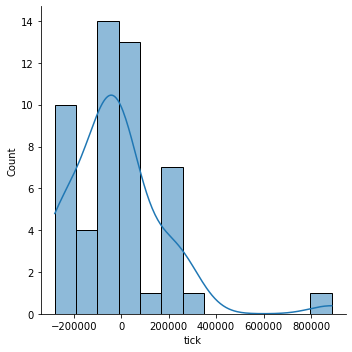

In [327]:
sns.displot( df['tick'], kde = True)

<AxesSubplot:xlabel='tick', ylabel='Count'>

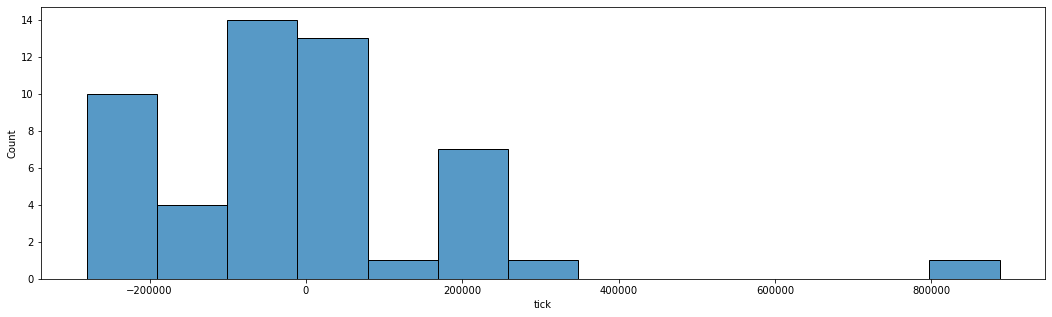

In [328]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.histplot(data = df, x = 'tick', ax=ax)

<AxesSubplot:>

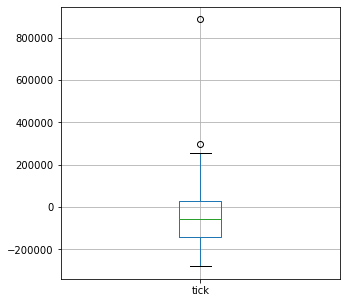

In [329]:
cat_cols = ['tick']

df[cat_cols].boxplot(figsize=(5,5))

In [330]:
#TotalValueLockedUSD

<AxesSubplot:>

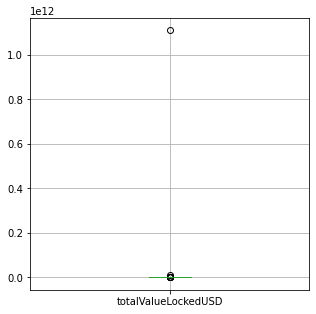

In [331]:
cat_cols = ['totalValueLockedUSD']

df[cat_cols].boxplot(figsize=(5,5))

As is evident from the plot we need to normalize the variable totalValueLockedUSD. Deleting outliers is not an option

In [332]:
Valued_Locked_Sum =  df['totalValueLockedUSD'].sum()

In [333]:
Valued_Locked_Sum

1127298526554.526

In [334]:
#price per tick
#$ price = 1.0001 ^ (-tick) * 10^12
df['tick_price'] = pow(1.0001,  (df['tick']*-1))*pow(10,12) 

In [335]:
df['tick_price'].sum()

8.45289069026492e+24

<AxesSubplot:>

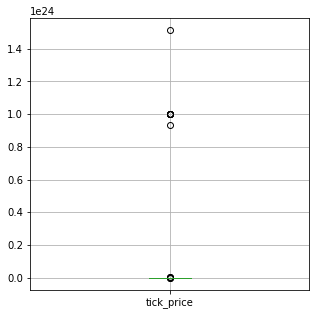

In [336]:
cat_cols = ['tick_price']

df[cat_cols].boxplot(figsize=(5,5))

Need to normalize it as deleting ouliters is not an option

In [337]:
df['tick_price'].value_counts()

1.000598e+24    2
1.000097e+24    2
2.164656e+12    1
1.653963e+15    1
1.000000e+11    1
1.320335e+16    1
1.528946e+13    1
9.363187e+23    1
1.512217e+24    1
1.631622e+15    1
1.000100e+12    1
1.282855e+08    1
1.273649e+20    1
1.020199e+19    1
6.107448e+14    1
2.839274e+10    1
1.001699e+24    1
6.161428e+14    1
1.012783e-01    1
1.676949e+03    1
9.934221e+11    1
8.261407e+10    1
1.279777e+20    1
2.648121e+17    1
1.663583e+15    1
1.000500e+12    1
2.943047e+14    1
9.964067e+11    1
1.020200e+15    1
1.661925e+03    1
1.662590e+03    1
6.814187e+00    1
9.997974e+23    1
1.000200e+12    1
6.015314e+20    1
6.821686e+00    1
1.000000e+12    1
4.101407e+09    1
1.000601e+10    1
6.019526e+20    1
1.663084e+15    1
2.374665e+14    1
1.661759e+03    1
2.171375e+14    1
1.194097e+15    1
2.728765e+15    1
9.997001e+11    1
4.447435e+02    1
2.939251e-27    1
Name: tick_price, dtype: int64

In [338]:
df['tick_price'].describe()

count    5.100000e+01
mean     1.657430e+23
std      3.941640e+23
min      2.939251e-27
25%      5.550340e+10
50%      2.374665e+14
75%      5.233400e+18
max      1.512217e+24
Name: tick_price, dtype: float64

In [339]:
#Liquidity

In [340]:
df['liquidity'] = df['liquidity'].astype(float)

<AxesSubplot:>

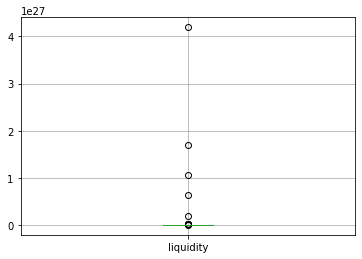

In [341]:
#Outlier presence is significant 
df.boxplot(column=['liquidity'])

In [342]:
df['liquidity_copy'] = df['liquidity'].copy()

In [343]:
#Mean greater than std means too big a range
df['liquidity'].describe()

count    5.100000e+01
mean     1.542367e+26
std      6.459196e+26
min      0.000000e+00
25%      3.554859e+18
50%      1.734330e+22
75%      9.713800e+23
max      4.195543e+27
Name: liquidity, dtype: float64

In [344]:
df['liquidity'].value_counts()

0.000000e+00    2
3.135210e+20    1
2.519721e+25    1
6.131589e+23    1
1.855175e+14    1
6.324714e+26    1
6.379413e+22    1
2.298474e+20    1
8.332449e+18    1
5.263860e+23    1
1.000500e+25    1
4.156271e+23    1
6.515108e+21    1
1.706245e+27    1
3.287147e+22    1
5.467515e+20    1
1.654606e+23    1
4.625914e+19    1
1.000365e+22    1
6.013065e+16    1
6.542824e+23    1
2.305143e+25    1
1.889626e+26    1
6.965877e+21    1
4.024925e+23    1
5.672635e+23    1
2.213738e+16    1
1.059630e+27    1
4.074098e+19    1
3.266606e+19    1
1.131324e+19    1
2.307415e+18    1
1.152448e+24    1
2.000607e+23    1
9.490766e+17    1
4.229054e+18    1
1.215321e+18    1
1.000302e+17    1
1.734330e+22    1
1.290227e+25    1
3.822299e+12    1
2.880665e+18    1
1.007631e+24    1
9.351295e+23    1
2.131926e+18    1
2.084382e+24    1
2.785888e+24    1
4.142292e+23    1
4.195543e+27    1
8.098688e+16    1
Name: liquidity, dtype: int64

We need to normalize both liquidity and tick_price in order to get meaningful insights. 
There are two wasys to do it :
1) Do it in the original dataframe modifying the original columns

2) Do not modify the original columns. Copy the dataframe and normalzie the columns and extract them as series.

Here I choose option 1 

In [345]:
from sklearn.preprocessing import StandardScaler

In [346]:
cols_to_norm = ['tick_price','liquidity']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [347]:
df['tick_price']

1    -0.424650
2    -0.424677
3    -0.424677
5    -0.424677
6    -0.424677
7    -0.424677
8     2.137833
9     2.137064
10   -0.424677
11   -0.423135
12   -0.424677
13   -0.424677
14    2.139114
15   -0.424677
16   -0.424677
17   -0.423134
18   -0.424677
19   -0.424677
20   -0.424677
21   -0.424677
22   -0.424677
23   -0.424677
24   -0.424677
25   -0.424677
26   -0.424677
27   -0.424677
28   -0.424677
29   -0.424677
30   -0.424677
31   -0.424677
32   -0.424676
33   -0.424677
34    1.974415
35    3.450016
36   -0.424677
37   -0.424677
38   -0.424677
39   -0.424350
40   -0.424677
41   -0.424677
42    2.141936
43   -0.424677
44   -0.424677
45    2.137833
46   -0.424677
47   -0.424677
48   -0.424677
49   -0.424349
50    2.139114
51   -0.424676
52   -0.424677
Name: tick_price, dtype: float64

In [348]:
df['tick_price'] =  round(df['tick_price'], 4)

In [349]:
df['tick_price'].value_counts()

-0.4247    39
 2.1378     2
-0.4231     2
 2.1391     2
 2.1371     1
 1.9744     1
 3.4500     1
-0.4244     1
 2.1419     1
-0.4243     1
Name: tick_price, dtype: int64

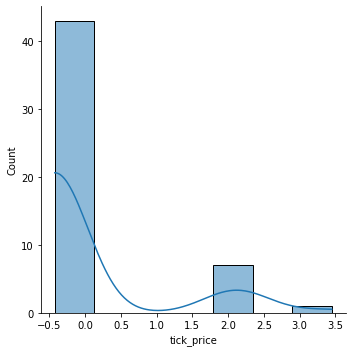

In [350]:
sns.displot( df['tick_price'], kde = True)

<AxesSubplot:xlabel='tick_price', ylabel='count'>

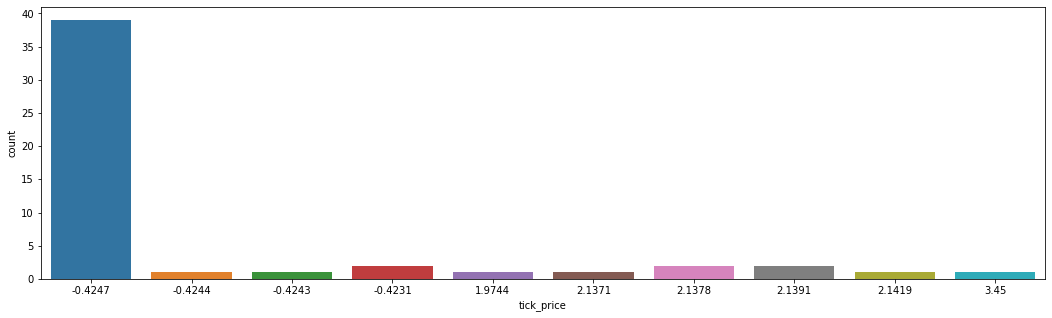

In [351]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(df['tick_price'], ax = ax)

In [352]:
#Normalzied liquidity

In [353]:
df['liquidity']

1    -0.241162
2     2.426698
3    -0.241162
5    -0.241162
6    -0.241162
7    -0.241162
8    -0.239360
9    -0.240849
10   -0.241162
11   -0.241162
12   -0.241162
13   -0.241162
14   -0.241135
15   -0.220988
16   -0.241162
17   -0.241162
18   -0.239587
19   -0.239700
20   -0.241162
21   -0.237903
22   -0.236806
23   -0.240515
24    6.318927
25    1.415660
26   -0.241162
27   -0.240275
28   -0.240533
29   -0.240204
30   -0.241162
31    0.747761
32   -0.241162
33   -0.241062
34   -0.241162
35   -0.241162
36   -0.240339
37   -0.225519
38   -0.240512
39   -0.201764
40   -0.241152
41   -0.241111
42   -0.241161
43   -0.240904
44   -0.241162
45   -0.241147
46   -0.241162
47   -0.240139
48   -0.205119
49    0.054297
50   -0.241151
51   -0.241162
52   -0.241162
Name: liquidity, dtype: float64

In [354]:
df['liquidity'] =  round(df['liquidity'], 2)

In [355]:
df['liquidity'].value_counts()

-0.24    42
 2.43     1
-0.22     1
 6.32     1
 1.42     1
 0.75     1
-0.23     1
-0.20     1
-0.21     1
 0.05     1
Name: liquidity, dtype: int64

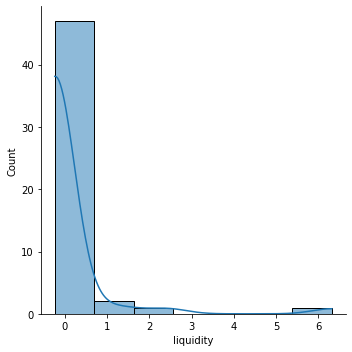

In [356]:
sns.displot( df['liquidity'], kde = True, ax=ax)

<AxesSubplot:xlabel='liquidity', ylabel='count'>

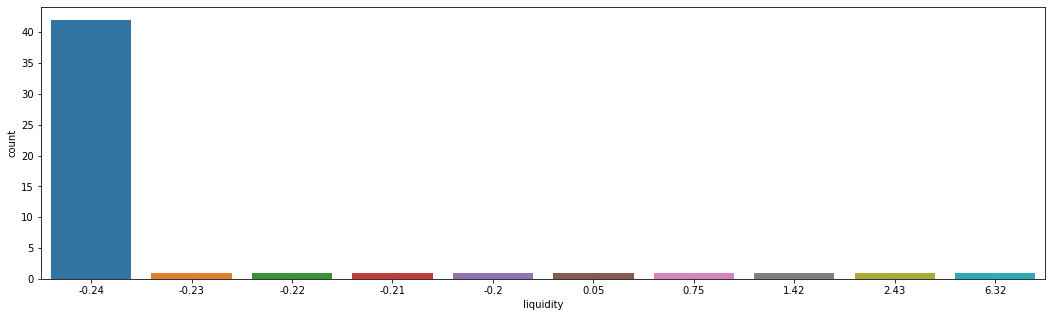

In [357]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(df['liquidity'], ax= ax)

Lets do some outlier removal on liquidity using IQR technique

In [358]:
o_cols = ['liquidity_copy']

for i in o_cols:
    Q1ss = df[i].quantile(0.25)
    Q3ss = df[i].quantile(0.75)
    IQRss = Q3ss - Q1ss
    df = df[ ~ ((df[i] < (Q1ss -  1.5 * IQRss)) | (df[i] > (Q3ss + 1.5 * IQRss))) ]


In [359]:
df['liquidity_copy'].describe()

count    4.100000e+01
mean     2.262753e+23
std      4.314407e+23
min      0.000000e+00
25%      2.131926e+18
50%      3.135210e+20
75%      4.024925e+23
max      2.084382e+24
Name: liquidity_copy, dtype: float64

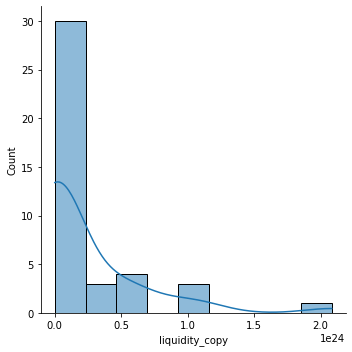

In [360]:
sns.displot( df['liquidity_copy'], kde = True, ax=ax)

<AxesSubplot:xlabel='liquidity_copy', ylabel='count'>

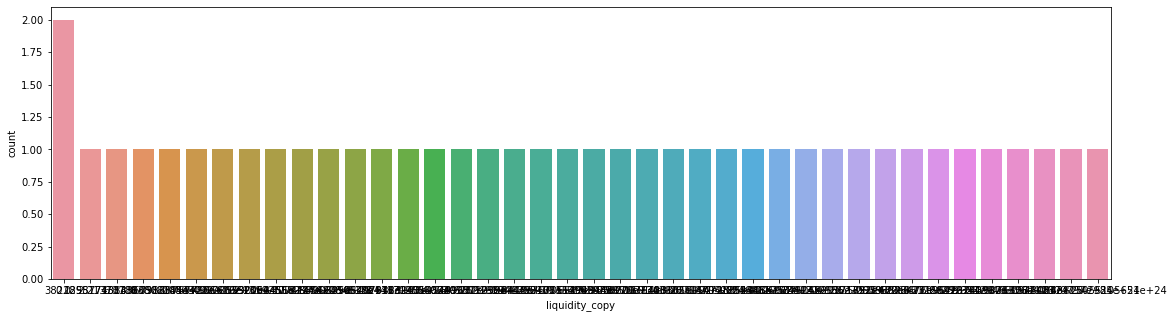

In [361]:
fig, ax = plt.subplots(figsize=(19, 5))
sns.countplot(df['liquidity_copy'], ax= ax)

Lets normalize this liquidity after outlier removal has been done once

In [362]:
cols_to_norm = ['liquidity_copy']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

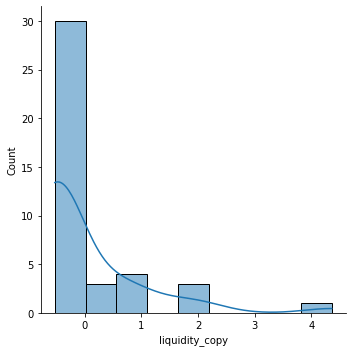

In [363]:
sns.displot( df['liquidity_copy'], kde = True, ax=ax)

<AxesSubplot:xlabel='liquidity_copy', ylabel='count'>

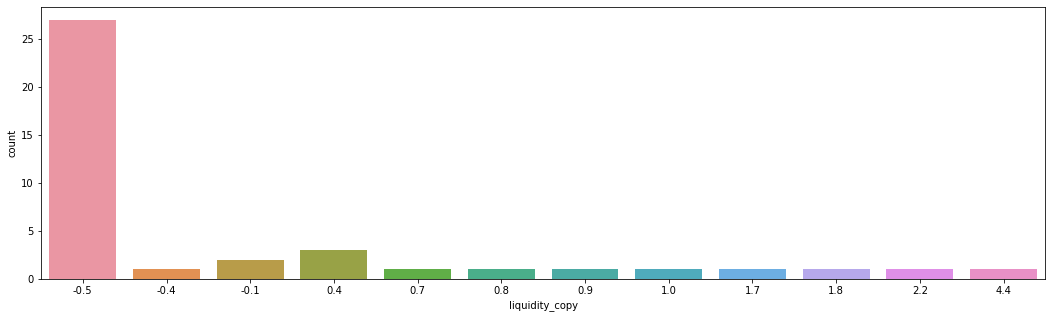

In [368]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(round(df['liquidity_copy'],1), ax= ax)

In [387]:
df['liquidity_copy'] = round(df['liquidity_copy'],1)

In [389]:
len(  df[ ( df['liquidity_copy'] >=-0.5) &  (df['liquidity_copy'] <=0.0)]) 
#otehr values have been deleted in outlier removal. 41 tick values left 


30

In [390]:
len(df)

41

Presuming AUM = ( price of token0 in USD * volume of token0 ) + ( price of token1 in USD * volume of token1)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 1 to 52
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      41 non-null     object 
 1   feeTier                 41 non-null     float64
 2   liquidity               41 non-null     float64
 3   sqrtPrice               41 non-null     object 
 4   tick                    41 non-null     float64
 5   t0_id                   41 non-null     object 
 6   t0_symbol               41 non-null     object 
 7   t0_name                 41 non-null     object 
 8   t0_decimals             41 non-null     object 
 9   t0_derivedETH           41 non-null     object 
 10  t0_typename             41 non-null     object 
 11  t1_id                   41 non-null     object 
 12  t1_symbol               41 non-null     object 
 13  t1_name                 41 non-null     object 
 14  t1_derivedETH           41 non-null     obje

In [210]:
type(df['token1Price'].iloc[0])

str

In [211]:
df['token1Price'] = df['token1Price'].astype(float)

In [212]:
df['t1_derivedETH'] = df['t1_derivedETH'].astype(float)

In [213]:
AUM1 = (((df['token0Price'] * df['volumeToken0']) )) .sum()

In [214]:
AUM2 = (((df['token1Price'] * df['volumeToken1']) )) .sum()

In [215]:
AUM = AUM1 + AUM2

In [216]:
AUM

3.4818756059589395e+38

In [217]:
Valued_Locked_Sum

1127298526554.526

In [218]:
AUM == Valued_Locked_Sum

False

Cannot prove AUM = Total Value Locked because exact formula of AUM not known